
<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">
### Introduction to Decision Trees

**Week 5 | Lesson 2.1**

---
| TIMING  | TYPE  
|:-:|---|---|
| 25 min| [Review: Regression vs. Classification](#review) |
| 20 min| [ML Interpretability](#hook) |
| 45 min| [Decision Trees](#content) |
| 20 min| [Conclusion](#conclusion) |
| 5 min | [Additional Resources](#more)

---

### Lesson Objectives
*After this lesson, you will be able to:*
- Apply Decision Trees to solve predictive analytics problems

- Understand how different hyperparameters of the decision tree affect its generalization ability 

- Differentiate between parametric and non-parametric models 

---
### Student Pre-Work 

*Before this lesson, you should already be able to:*

- Differentiate Classification and Regression problems 

- Build Linear Regression, Logistic Regression, and KNN models 

- Identify tradeoffs between bias and variance in machine learning


---
<a name="review"></a>
### Review: ML Algorithms Thus Far...

<img src=http://scikit-learn.org/stable/_static/ml_map.png>

| Algorithm  | Assumptions | Class/Reg/Both | Loss | Regularization | Parameters | Metrics | Intuition | Implementation
|:-:|---|---|
| Linear Regression  | [GM Assumptions](https://www.youtube.com/watch?v=NjTpHS5xLP8) | Regression | [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)|Yes | Yes, two ways to solve for parameters:  1. [Analytic Solution](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf); 2. [Gradient Descent](http://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/) | R-squared, MSE, MAE | [Geometric Intuition](https://www.youtube.com/watch?v=PbyP3goun2Y) | Your Homework! 
| Binary Logistic Regression  | [Logit Assumptions](http://schatz.sju.edu/multivar/guide/logistic.pdf) | Classification | [Binary Cross Entropy](https://image.slidesharecdn.com/chrishokamp-dublinnlp3-160805110319/95/task-based-learning-for-nlp-going-beyond-cross-entropy-chris-hokamp-10-638.jpg?cb=1470395213)| Yes | Yes, using Gradient Descent | ROC AUC, Precision / Recall / F1-Score, Accuracy | [Logistic Reg Intuition](https://www.youtube.com/watch?v=PbyP3goun2Y) | [Implementation from Class](https://github.com/ga-students/DSI-SF-5/blob/master/curriculum/week-04/logistic_regression/logistic_regression.py)
| Softmax // Multiclass Logistic Regression  | [Softmax Regression](http://cs231n.github.io/linear-classify/#softmax) | Classification | [Multi-class Log Loss // Cross Entropy](https://image.slidesharecdn.com/sharingonkaggleottoproductclassificationchallenge-150617020529-lva1-app6892/95/kaggle-otto-challenge-how-we-achieved-85th-out-of-3514-and-what-we-learnt-31-638.jpg?cb=1434854536)| Yes | Yes, using Gradient Descent | Precision / Recall / F-1 Score, Accuracy | [Softmax Regression](http://cs231n.github.io/linear-classify/#softmax) | Your Homework! 
|K-Nearest Neighbors | [KNN and Metric Learning](https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/) | Both (can also be used in an unsupervised way) | None.  since it's non-parametric but you find the nearest neighbors by minimizing Euclidean Distance | No | None | Minimizing distance metrics and the relevant metrics for classification and regression problems | [KNN Applications](https://quasiphysics.wordpress.com/2011/12/13/visualizing-k-nearest-neighbor-regression/) | [Implementation from Linear Algebra Lab](https://github.com/ga-students/DSI-SF-5/blob/master/curriculum/week-02/Linear_Algebra/3.2_Linear_Algebra_Lab_Solns.ipynb)

---
<a name="hook"> </a>

###  <a href=http://www.economist.com/news/finance-and-economics/21705329-governments-have-much-gain-applying-algorithms-public-policy> Machine Learning and Interpretability </a> 

<center> ** How do we build predictive algorithms that model human decision-making?** </center>

<img src=http://cdn.static-economist.com/sites/default/files/imagecache/full-width/images/print-edition/20160820_FND001_0.jpg>





---
### Human Decision Making 
<a name="content"></a>

<img src=https://qph.ec.quoracdn.net/main-qimg-05595706c5209f3466904e0483005bf1-p>

--- 

In [16]:
## Review: recursion 

def factorial(n):
    if n < 0 or type(n) == float:
        raise ValueError('Use Positive Integers')
    elif n <= 1: # base case 
        return 1 
    else: # slowly go towards the base case 
        return n * factorial(n-1)

print factorial(1)
print factorial(10)
print factorial(100)
#print factorial(3.5)

def binary_search(sorted_arr, elem):
    if not sorted_arr: # base case 
        return False 
    else:
        midpt = len(sorted_arr) / 2
        if sorted_arr[midpt] == elem: # base case 
            return True 
        elif sorted_arr[midpt] < elem:
            return binary_search(sorted_arr[midpt+1:], elem)
        else:
            return binary_search(sorted_arr[0:midpt], elem)

sorted_list = range(100)
assert binary_search(sorted_list, -1) == False 
assert binary_search(sorted_list, 101) == False 
assert binary_search(sorted_list, 50) == True
assert binary_search(sorted_list, 0) == True


1
3628800
93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


## Decision Trees: Intuition 
#### <center> <a href=http://www.r2d3.us/visual-intro-to-machine-learning-part-1/> Visual Introduction to Machine Learning </a> </center>
<img src=http://i.imgur.com/iz5q0Op.png>

** Decision Trees model the world using a series of _if else_ statements in order to reach a conclusion. As in life, in machine learning, the goal is to discover a series of mini-steps that will ultimately lead to a good decision. Since decision are easy to interpret, there are many ways to look at them: **

<img src=http://kubicode.me/img/From-Gradient-Boosting-to-GBT/cart.png>

> ** Check: What does the _dendogram_ (tree structure) look like for the following partition? **
<img src=http://1.bp.blogspot.com/_0Lnn2oP30gU/TJiw6U7BueI/AAAAAAAAAIQ/EZi8Lg2DrEw/s1600/RECURSIVE+PARTITIONING.bmp> 
---
> ** Check: What does the partition structure look like for the following dendogram? **
<img src=https://image.slidesharecdn.com/machinelearningtreesalgrorithmbasicsrandomforestgbm-140605025918-phpapp01/95/machine-learning-basics-using-trees-algorithm-random-forest-gradient-boosting-7-638.jpg?cb=1401938534>

---
### Decision Trees: Growing A Decision Tree 

<center> _How do you go from a dataset to a tree?_ </center>
<img src=http://www.saedsayad.com/images/Decision_Tree_1.png>

### CART: Classification and Regression Trees 


#### Let's get the jargon out of the way...

Decision Trees have **nodes** and **edges**. The nodes represent the decision points about the output variable given the predictors, and the edges are the "paths" between nodes that represent answers to the questions.

- The top node is called the **root node.** It has 0 incoming edges, and 2+ outgoing edges.

- **Internal nodes** test a condition on a specific feature. They have 1 incoming edge, and 2+ outgoing edges.

- A **leaf node or terminal node** contains a class label (or regression value). It has 1 incoming edge and 0 outgoing edges.


<img src=https://www.analyticsvidhya.com/blog/wp-content/uploads/2015/01/Decision_Tree_2.png>

- **Classification Trees ** have class probabilities at the leaves. E.g. Probability I’ll be in heavy rain is 0.9 (so take an umbrella).

- **Regression trees** have a mean response at the leaves. E.g. The expected amount of rain is 2in (so take an umbrella). 

#### Building a Decision Tree

Building decision trees requires algorithms capable of determining an optimal choice at each node. This choice is determined by choosing the _independent variables_ or the _parameter_ that will decrease error at that split. 

One such algorithm is [**Hunt's algorithm**](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html). This is a greedy, recursive algorithm that leads to a local optimum:

- [**Greedy:**](https://en.wikipedia.org/wiki/Greedy_algorithm) the algorithm makes the most optimal decision it can at each step.
- [**Recursive:**](https://en.wikipedia.org/wiki/Recursion) the algorithm splits task into subtasks and solves each the same way.
- [**Local optimum:**](https://en.wikipedia.org/wiki/Local_optimum) the algorithm finds a solution just for the given neighborhood of points.

The algorithm works by recursively partitioning records into smaller and smaller subsets. The partitioning decision is made at each node according to a metric called **purity.** A node is said to be 100% pure when all of its records belong to a single class (or have the same value).



#### Pseudocode classification decision tree algorithm

---

    Given a set of data points D_t at node t:
        If all data points in D_t belong to class A: 
            t is a leaf node corresponding to class (Base case)
        Else if D_t contains records from both A and B:
            Create test condition to partition the observations
            Define t as an internal node, with outgoing edges to child nodes
            partition records in D_t with conditional test logic to child nodes
            Recursively apply steps at each child node.

- Splits can be binary way or multi-way. 
- Features can be categorical or continuous.


## Optimization and "purity"

Recall from the algorithm above we iteratively create test conditions to split the data. 

---

In a binary classification task, a maximum impurity partition is given by the distribution (classification):

### $$ p(0|t) = p(1|t) = 0.5 $$

where both classes are equally present in the partition distribution $t$.

Maximum purity, on the other hand, is when only one class is present, i.e: 

### $$ p(0|t) = 1 – p(1|t) = 1 $$


### Purity objective function

To achieve maximum purity we need an **objective function** to optimize. 

We want our objective function to measure the **gain in purity** from a particular split. Therefore it depends on the class distribution over the nodes (before and after the split). 

For example, let 

### $$p(i|t)$$ 

be the probability of **`class i`** in the data at **`node t`** (e.g., the fraction of records labeled **`i`** at node **`t`**) 

We then define an impurity function that will smoothly vary between the two extreme cases of minimum impurity (one class or the other only) and the maximum impurity case cas as an equal mix.

## Common purity functions (classification)

---

## $$ \text{Entropy} = - \sum_{i=1}^{classes} p(i\;|\;t)\;log_2\; p(i\;|\;t) $$

## $$ \text{Gini} = 1 - \sum_{i=1}^{classes} p(i\;|\;t)^2 $$

The Gini inpurity is primarily used in the CART algorithm, but both Gini and Entropy are available in sklearn's classification and decision tree models.

![purity functions](https://sebastianraschka.com/images/faq/decision-tree-binary/overview-plot.png)

---

Impurity measures on their own they are not enough to tell us how a split will do. We need to look at impurity **before & after** the split. We can make this comparison using what is called the **gain**: 

## $$ \Delta = I(\text{parent}) - \sum_{\text{children}}\frac{N_j}{N}I(\text{child}_j) $$

Where $I$ is the impurity measure, $N_j$ denotes the number of records at child node $j$, and $N$ denotes the number of records at the parent node. When $I$ is the [**entropy function**](https://en.wikipedia.org/wiki/Binary_entropy_function), this quantity is called the [**information gain**](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees).

**[Nice example of how misclassification error can break branching.](http://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html)**

#### CARTs: Regression Trees 

The algorithm for learning regression trees is very similar except you minimize the variance between the splits. 

$$ SSE = \Sigma_{i \in S_1} (y_i - \bar{y_1})^2 + \Sigma_{i \in S_2} (y_i - \bar{y_2})^2 $$

<img src=http://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_0011.png>

Let's go through...

[Decision Trees I](http://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-s06/www/DTs.pdf)

[Decision Trees II](http://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-s06/www/DTs.pdf)

> **Check:** How do you choose attribute, value to split on at each level of the tree? 

For classification, you maximize information gain and minimize entropy or gini coefficient. For regression, you pick the question (feature split) that minimizes the variance in your continuous labels after the split. 

> **Check:** When do you stop splitting? When is a node declared a leaf node? 

1. The leaf node has number of data points below a certain threshold
2. Depth of the tree is too high due to the split
3. Information Gain, Variance reduction is not statistically significant.

> **Check:** If a leaf node is impure (not perfectly separted), how should the class label be assigned? 

If possible, see if you can split on other features that increase the information gain. Otherwise, pick the majority class. You can also assign randomly labels with prior probabilites akin to what class probabilities you saw in the training set. 

> **Check:** If a tree is too large, how can it be pruned?

Set threshold on minimum data points required for the leaf nodes, maximum depth, significance of split for information gain or variance reduction. 


---
### Decision Tree: Codealong

In [1]:
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# We will make some data for these functions of 100 points of x from 0.1 to 10:
# 
# 1. The general log function for x
# 2. The sin function
# 3. The exponential function
# 4. The x**2 function
#
def make_data(points=100):
    x = np.linspace(0.1, 10, points)
    
    data = {
        'x':x,
        'ygenlog':stats.genlogistic.pdf(x, 20)*500 + np.random.normal(0, 2, size=points),
        'ysin':np.sin(x)*20 + np.random.normal(0, 2, size=points),
        'yexp':np.exp(x/1.3) + np.random.normal(0, 2, size=points),
        'ysq':(x-5)**2 + np.random.normal(0, 1, size=points)
    }

    return data

# The data is put into a dictionary for convenience:
d = make_data()
x = d['x']

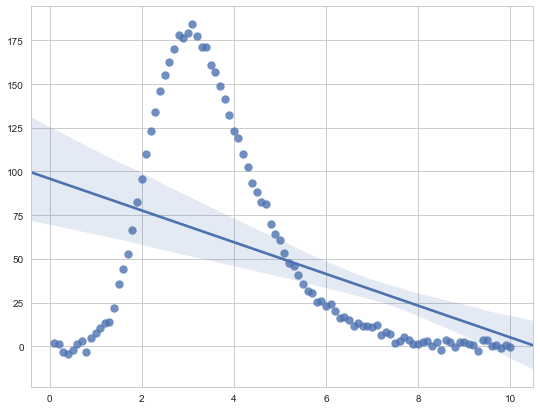

In [3]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ygenlog'], scatter_kws={'s':70})

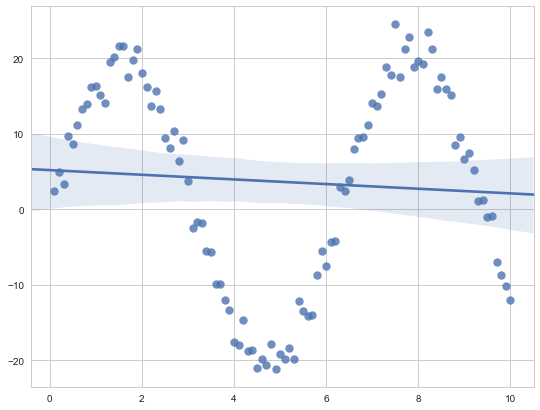

In [20]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ysin'], scatter_kws={'s':70})

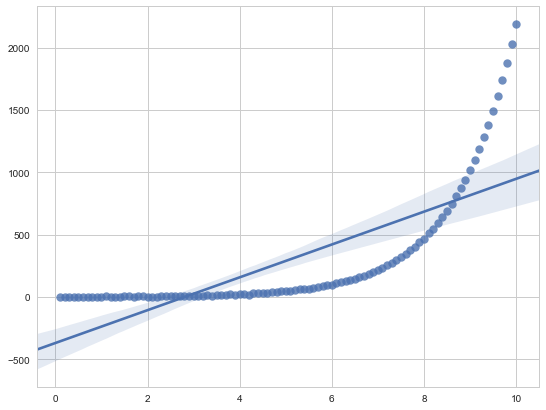

In [21]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['yexp'], scatter_kws={'s':70})

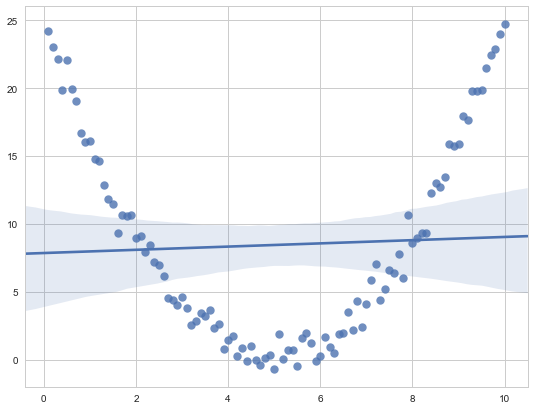

In [22]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ysq'], scatter_kws={'s':70})

In [4]:
def build_tree_models(x, y, tree_depth_range=range(1,11)):
    tree_model_ypreds = {}
    
    for i in tree_depth_range:
        model = DecisionTreeRegressor(max_depth=i) # build a model given a depth 
        model.fit(x[:, np.newaxis], y)
        tree_model_ypreds[i] = model.predict(x[:, np.newaxis])
        
    return tree_model_ypreds

# A function to iterate through our data dictionary of different functions and build the tree models:
#
def fit_trees(data_dict):
    trees_dict = {}
    x = data_dict['x']
    for label, ys in data_dict.items():
        if not label == 'x':
            tree_ys = build_tree_models(x, ys)
            trees_dict[label] = tree_ys
    
    return trees_dict

tr = fit_trees(d)

In [5]:
# This function plots the x and y data as well as the decision tree decisions for the predicted y:

def tree_plotter(d, tr, label, treenum):
    fig = plt.figure(figsize=(9, 7))
        
    x = d['x']
    y_true = d[label]
    y_pred = tr[label][treenum]
    
    ax = sns.regplot(x=x, y=y_true, scatter_kws={'s':70}, fit_reg=False, x_ci=None, ci=None)
    
    ax.plot(x, y_pred, c="#D7B734", linewidth=5)
    
    ax.set_title('Tree depth: '+str(treenum)+'\n', fontsize=20)
    
    plt.show()
    

# Widget inputs code:
#
def tree_plot_vars(function='ysq', treenum=1):
    tree_plotter(d, tr, function, treenum)
    

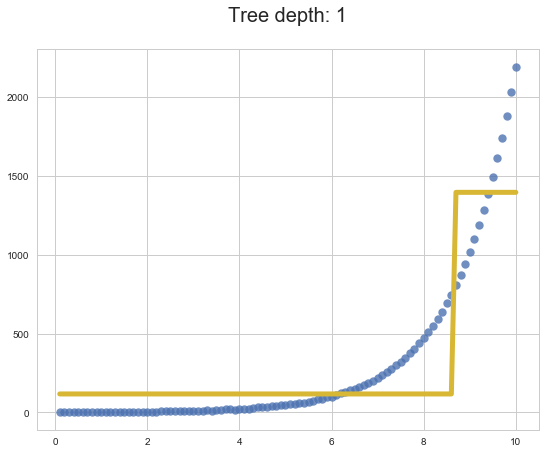

In [25]:
widgets.interact(tree_plot_vars,
                 function=('ysq','yexp','ysin','ygenlog'),
                 treenum=widgets.IntSlider(min=1, max=10, step=1, continuous_update=False, value=1))

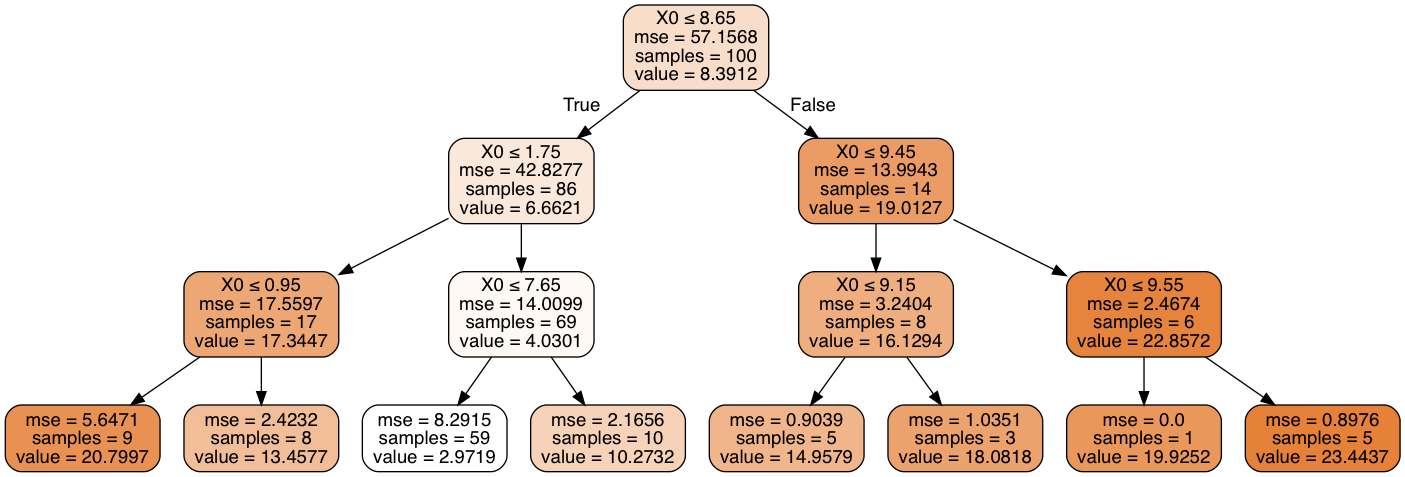

In [6]:
# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#pip install pydotplus 
# brew install graphviz

# Make a single regression tree model with depth 3 for x**2 function:
# 
x = d['x']
y = d['ysq']

dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(x[:, np.newaxis], y)

dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

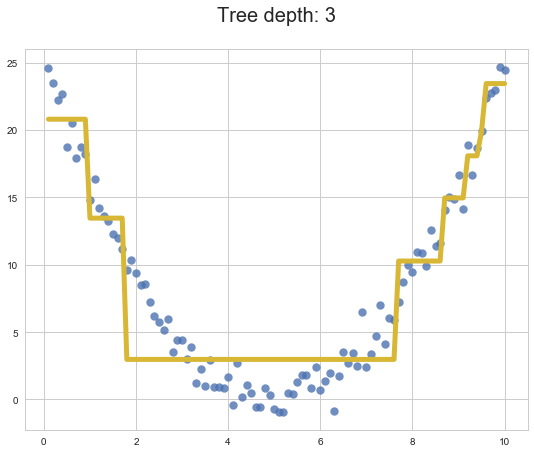

In [7]:
# Plot the decisions for y based on the decision tree DAG above
tree_plotter(d, tr, 'ysq', 3)

## Addressing overfitting

A stopping criterion determines when to no longer construct further nodes. 

We can stop when all records belong to the same class, or when all records have the same attributes. This [**maximizes variance at the expense of bias**](http://blog.fliptop.com/blog/2015/03/02/bias-variance-and-overfitting-machine-learning-overview/), leading to overfitting. 

**Setting a maximum depth:**

A simple way to prevent overfitting is to set a hard limit on the "depth" of the decision tree.

**Minimum observations to make a split:**

An alternative to maximum depth (and can be used at the same time), is to specify the minimum number of datapoints reqired to make a split at a node.


---
### Conclusion
<a name="conclusion"></a>

### Advantages...
- **Interpretability**
- Requires **little data preparation**. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed.
- Able to handle both numerical and categorical data. 
  
- Uses a **white box** model. If a given situation is observable in a model the explanation for the condition is easily explained by boolean logic. By contrast, in a **black box** model, the explanation for the results is typically difficult to understand, for example in neural networks.

- Possible to **validate a model using statistical tests.** That makes it possible to account for the reliability of the model.

- Performs well with large datasets. Large amounts of data can be analyzed using standard computing resources in reasonable time.

- Once trained can be implemented on hardware and has extremely fast execution. Real-time applications like trading, for example.

### Disadvantages

- ** Greedy, locally optimal solutions **

- Very high variance and hence **overfitting**

- Issues with class imbalances 

---
<a name="more"></a>
### Additional Resources

[Implement Decision Tree from Scratch](
http://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/)

[Decision Trees I](http://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-s06/www/DTs.pdf)

[Decision Trees II](http://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-s06/www/DTs.pdf)